# 代码及其运行结果

## 生成数据集

In [47]:
from sklearn.datasets import make_blobs # 生成分类数据

In [6]:
# we create two clusters of random points
n_samples_1 = 300 # 样本个数
n_samples_2 = 300
centers = [[0.0, 0.0], [2.0, 2.0]] # 类别数
clusters_std = [1.5, 2.5] # 每个类别的方差
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

## 划分数据集

In [46]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split # 分割数据

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=4)
# print(X_test, y_test) # 将数据集分为训练集和测试集

## 导入分类器

### LR分类器

In [9]:
from sklearn.linear_model import LogisticRegression # 导入LR分类器

In [10]:
lr_clf = LogisticRegression() # 选定分类器
lr_clf.fit(X_train, y_train) # 输入训练集进行训练

LogisticRegression()

### LDA分类器

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # 导入LDA分类器

In [12]:
lda_clf = LinearDiscriminantAnalysis() # 选定分类器
lda_clf.fit(X_train, y_train) # 输入训练集进行训练

LinearDiscriminantAnalysis()

### SVM分类器

In [13]:
from sklearn import svm # 导入SVM分类器

In [14]:
svm_clf = svm.SVC(kernel="linear", C=1.0) # 选定分类器 
svm_clf.fit(X_train, y_train) # 输入训练集进行训练

SVC(kernel='linear')

### 朴素贝叶斯分类器

In [15]:
from sklearn.naive_bayes import GaussianNB # 导入朴素贝叶斯分类器

In [16]:
bayes_clf = GaussianNB() # 选定分类器
bayes_clf.fit(X_train, y_train) # 输入训练集进行训练

GaussianNB()

### 打印决策函数的特征系数和截距

In [49]:
print("LR分类器决策函数的特征系数和截距分别为：")
print(lr_clf.coef_) # 打印决策函数中的特征系数 :w1,w2
print(lr_clf.intercept_) # 打印决策函数中的截距 :w0
print("LDA分类器决策函数的特征系数和截距分别为：")
print(lda_clf.coef_)
print(lda_clf.intercept_)
print("SVM分类器决策函数的特征系数和截距分别为：")
print(svm_clf.coef_)
print(svm_clf.intercept_)

LR分类器决策函数的特征系数和截距分别为：
[[0.58822629 0.47593512]]
[-0.94555859]
LDA分类器决策函数的特征系数和截距分别为：
[[0.5876342  0.48142368]]
[-1.07320381]
SVM分类器决策函数的特征系数和截距分别为：
[[0.45790774 0.36512643]]
[-0.84210949]


## 模型评估-性能度量

* 精度

In [19]:
from sklearn.metrics import accuracy_score

print("LR分类器的精度为：",accuracy_score(y_test, lr_clf.predict(X_test)))
print("LDA分类器的精度为：",accuracy_score(y_test, lda_clf.predict(X_test)))
print("SVM分类器的精度为：",accuracy_score(y_test, svm_clf.predict(X_test)))
print("朴素贝叶斯分类器的精度为：",accuracy_score(y_test, bayes_clf.predict(X_test)))

LR分类器的精度为： 0.75
LDA分类器的精度为： 0.75
SVM分类器的精度为： 0.7416666666666667
朴素贝叶斯分类器的精度为： 0.7333333333333333


* 平均精度——每个类别下的样本精度的算术平均

In [20]:
from sklearn.metrics import balanced_accuracy_score

print("LR分类器的平均精度为：",balanced_accuracy_score(y_test, lr_clf.predict(X_test)))
print("LDA分类器的平均精度为：",balanced_accuracy_score(y_test, lda_clf.predict(X_test)))
print("SVM分类器的平均精度为：",balanced_accuracy_score(y_test, svm_clf.predict(X_test)))
print("朴素贝叶斯分类器的平均精度为：",balanced_accuracy_score(y_test, bayes_clf.predict(X_test)))

LR分类器的平均精度为： 0.7544353703182203
LDA分类器的平均精度为： 0.756406646015207
SVM分类器的平均精度为： 0.7489439594480428
朴素贝叶斯分类器的平均精度为： 0.7375387214869051


* 混淆矩阵

In [29]:
from sklearn.metrics import confusion_matrix

print("LR分类器得到的混淆矩阵为：\n",confusion_matrix(y_test, lr_clf.predict(X_test)))
print("LDA分类器得到的混淆矩阵为：\n",confusion_matrix(y_test, lda_clf.predict(X_test)))
print("SVM分类器得到的混淆矩阵为：\n",confusion_matrix(y_test, svm_clf.predict(X_test)))
print("朴素贝叶斯分类器得到的混淆矩阵为：\n",confusion_matrix(y_test, bayes_clf.predict(X_test)))

LR分类器得到的混淆矩阵为：
 [[42 11]
 [19 48]]
LDA分类器得到的混淆矩阵为：
 [[43 10]
 [20 47]]
SVM分类器得到的混淆矩阵为：
 [[43 10]
 [21 46]]
朴素贝叶斯分类器得到的混淆矩阵为：
 [[41 12]
 [20 47]]


* 查准率和查全率

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('LR分类器的查准率和查全率分别为：')
print(precision_score(y_test, lr_clf.predict(X_test), average='weighted'))
print(recall_score(y_test, lr_clf.predict(X_test), average='weighted'))
print('LDA分类器的查准率和查全率分别为：')
print(precision_score(y_test, lda_clf.predict(X_test), average='weighted'))
print(recall_score(y_test, lda_clf.predict(X_test), average='weighted'))
print('SVM分类器的查准率和查全率分别为：')
print(precision_score(y_test, svm_clf.predict(X_test), average='weighted'))
print(recall_score(y_test, svm_clf.predict(X_test), average='weighted'))
print('朴素贝叶斯分类器的查准率和查全率分别为：')
print(precision_score(y_test, bayes_clf.predict(X_test), average='weighted'))
print(recall_score(y_test, bayes_clf.predict(X_test), average='weighted'))

LR分类器的查准率和查全率分别为：
0.7583356487913309
0.75
LDA分类器的查准率和查全率分别为：
0.7618351434140908
0.75
SVM分类器的查准率和查全率分别为：
0.755375744047619
0.7416666666666667
朴素贝叶斯分类器的查准率和查全率分别为：
0.7416319347967028
0.7333333333333333


* F1-score

In [44]:
from sklearn.metrics import f1_score

# 标准的 F1
print("LR分类器的F1为：",f1_score(y_test, lr_clf.predict(X_test), average='weighted'))
print("LDA分类器的F1为：",f1_score(y_test, lda_clf.predict(X_test), average='weighted'))
print("SVM分类器的F1为：",f1_score(y_test, svm_clf.predict(X_test), average='weighted'))
print("朴素贝叶斯分类器的F1为：",f1_score(y_test, bayes_clf.predict(X_test), average='weighted'))

LR分类器的F1为： 0.7508354218880534
LDA分类器的F1为： 0.7506952169076752
SVM分类器的F1为： 0.7422590507956363
朴素贝叶斯分类器的F1为： 0.7342244500139238


* 分类报告

In [33]:
from sklearn.metrics import classification_report

print("LR分类器的分类报告为：\n",classification_report(y_test, lr_clf.predict(X_test)))
print("LDA分类器的分类报告为：\n",classification_report(y_test, lda_clf.predict(X_test)))
print("SVM分类器的分类报告为：\n",classification_report(y_test, svm_clf.predict(X_test)))
print("朴素贝叶斯分类器的分类报告为：\n",classification_report(y_test, bayes_clf.predict(X_test)))

LR分类器的分类报告为：
               precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.81      0.72      0.76        67

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.76      0.75      0.75       120

LDA分类器的分类报告为：
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        53
           1       0.82      0.70      0.76        67

    accuracy                           0.75       120
   macro avg       0.75      0.76      0.75       120
weighted avg       0.76      0.75      0.75       120

SVM分类器的分类报告为：
               precision    recall  f1-score   support

           0       0.67      0.81      0.74        53
           1       0.82      0.69      0.75        67

    accuracy                           0.74       120
   macro avg       0.75      0.75      0.74       120
weighted avg       0.76      0

## 可视化

In [51]:
import matplotlib.pyplot as plt # 画图包

* ROC可视化

最新的matplotlib版本自动封装了绘制ROC曲线的plot_roc_curve()方法，可以快速便捷地直接绘制出不同模型的ROC曲线。

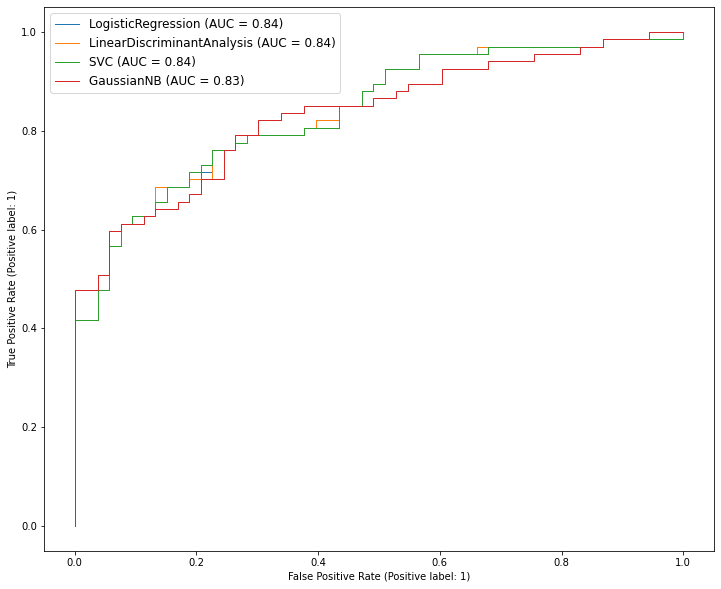

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score

# 创建画布
fig,ax = plt.subplots(figsize=(12,10))
lr_roc = plot_roc_curve(estimator=lr_clf, X=X_test, 
                        y=y_test, ax=ax, linewidth=1)
lda_roc = plot_roc_curve(estimator=lda_clf, X=X_test, 
                        y=y_test, ax=ax, linewidth=1)
svm_roc = plot_roc_curve(estimator=svm_clf, X=X_test, 
                        y=y_test, ax=ax, linewidth=1)
bayes_roc = plot_roc_curve(estimator=bayes_clf, X=X_test, 
                        y=y_test, ax=ax, linewidth=1)

# 更改图例字体大小
ax.legend(fontsize=12)

# 更改图例字体大小
plt.show()

<center>图1-1 四种分类器的ROC曲线</center>

* 画图

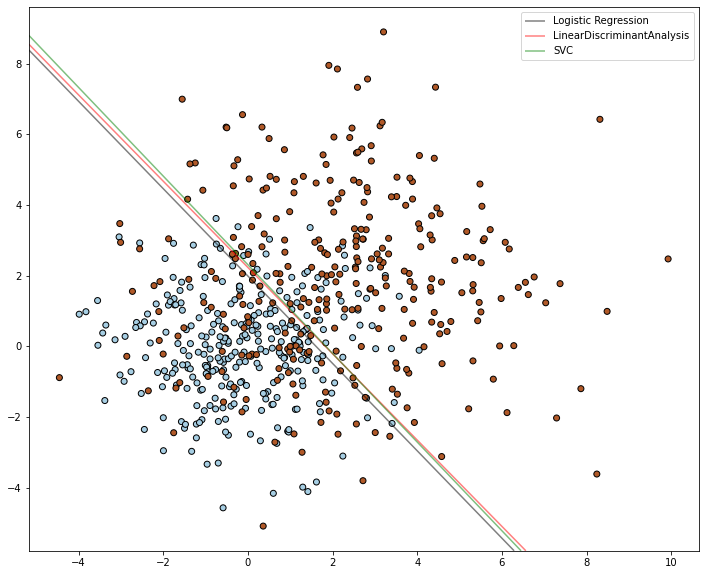

In [50]:
# create a canvas
fig,ax = plt.subplots(figsize=(12,10))

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z1 = lr_clf.decision_function(xy).reshape(XX.shape)
Z2 = lda_clf.decision_function(xy).reshape(XX.shape)
Z3 = svm_clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z1, colors="k", levels=[0], alpha=0.5, linestyles=["-"])
b = ax.contour(XX, YY, Z2, colors="r", levels=[0], alpha=0.5, linestyles=["-"])
c = ax.contour(XX, YY, Z3, colors="g", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend(
    [a.collections[0], b.collections[0], c.collections[0]],
    ["Logistic Regression", "LinearDiscriminantAnalysis","SVC"],
    loc="upper right",
)
plt.show()

<center>图1-2 样本分布以及三种线性分类器的决策面</center>

# 小结

### 四种分类器的过程

#### Logistic回归的一般过程

* （1）收集数据：采用任意方法收集数据

* （2）准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳

* （3）分析数据：采用任意方法对数据进行分析

* （4）训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数

* （5）使用算法：首先，我们需要输入一些数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定他们属于哪个类别；在这之后，我们就可以在输出的类别上做一些其他分析工作。

#### LDA算法流程

**输入**：数据集 D = {(x1, y1),  (x2, y2), .... (xm, ym)}，其中任意样本 xi 为 n维向量， yi € {C1,  c2, ...Ck}，降维到的维度 d。

**输出**：降维后的样本集 D'

* （1）计算类内散度矩阵Sw

* （2）计算类间散度矩阵 Sb

* （3）计算矩阵Sw-1Sb

* （4）计算 Sw-1Sb 的最大的 d个特征值和对应的 d个特征向量 （w1, w2, ... wd），得到投影矩阵 W

* （5）对样本集中的每一个样本特征 xi，转化为新的样本 zi = WTxi

* （6）得到输出样本集 D' = {(z1, y1),  (z2, y2), .... (zm, ym)}

#### 支持向量机的线性分类

给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法创建一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。SVM模型是将实例表示为空间中的点，这样映射就使得单独类别的实例被尽可能宽的明显的间隔分开。然后，将新的实例映射到同一空间，并基于他们落在间隔的哪一侧来预测所属类别。

#### 高斯朴素贝叶斯分类过程

* （1）利用GaussianNB建立简单模型

* （2）经过训练集训练后，观察各个属性值

* （3）priors属性：获取各个类标记对应的先验概率

* （4）class_prior_属性：同priors一样，都是获取各个类标记对应的先验概率，区别在于priors属性返回列表，class_prior_返回的是数组

* （5）class_count_属性：获取各类标记对应的训练样本数

* （6）theta_属性：获取各个类标记在各个特征上的均值

* （7）sigma_属性：获取各个类标记在各个特征上的方差

### 编程过程中遇到的问题以及解决方法

老师上课时提到的《西瓜书》习题7.5

试证明：二分类任务中两类数据满足高斯分布且方差相同时，线性判别分析产生贝叶斯最优分类器。

果然在生成数据集的时候如果两类都服从高斯分布并且方差相等的时候，用LDA分类器和高斯贝叶斯分类器产生的决策界是**完全一致的！**

解决方法：为了更好地体现LDA和高斯朴素贝叶斯的区别，将两类的方差设置为不同值